# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first

Given a list of values, there are several ways to count the frequency of each value.

In [2]:
t = [1, 2, 2, 3, 5]

You can use a Python dictionary:

In [3]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 2, 3: 1, 5: 1}

You can use a `Counter` (which is a dictionary with additional methods):

In [4]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

Or you can use the `Hist` object provided by `thinkstats2`:

In [5]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

`Hist` provides `Freq`, which looks up the frequency of a value.

In [6]:
hist.Freq(2)

2

You can also use the bracket operator, which does the same thing.

In [7]:
hist[2]

2

If the value does not appear, it has frequency 0.

In [8]:
hist[4]

0

The `Values` method returns the values:

In [9]:
hist.Values()

dict_keys([1, 2, 3, 5])

So you can iterate the values and their frequencies like this:

In [10]:
for val in sorted(hist.Values()):
    print(val, hist[val])

1 1
2 2
3 1
5 1


Or you can use the `Items` method:

In [11]:
for val, freq in hist.Items():
     print(val, freq)

1 1
2 2
3 1
5 1


`thinkplot` is a wrapper for `matplotlib` that provides functions that work with the objects in `thinkstats2`.

For example `Hist` plots the values and their frequencies as a bar graph.

`Config` takes parameters that label the x and y axes, among other things.

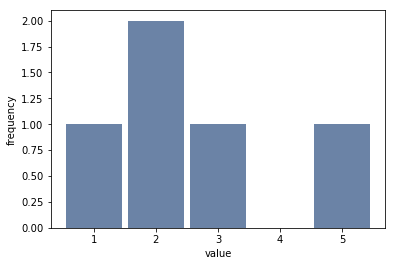

In [12]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

As an example, I'll replicate some of the figures from the book.

First, I'll load the data from the pregnancy file and select the records for live births.

In [13]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
live.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


Here's the histogram of birth weights in pounds.  Notice that `Hist` works with anything iterable, including a Pandas Series.  The `label` attribute appears in the legend when you plot the `Hist`. 

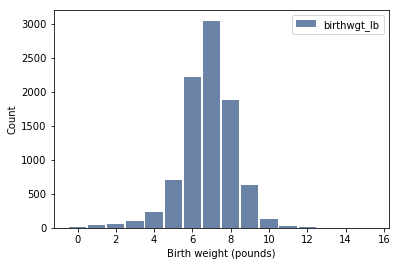

In [14]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

Before plotting the ages, I'll apply `floor` to round down:

In [15]:
ages = np.floor(live.agepreg)

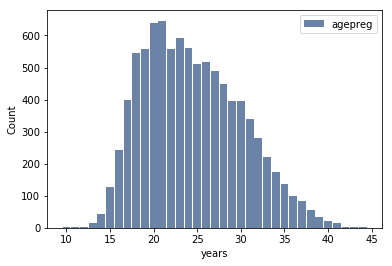

In [16]:
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

As an exercise, plot the histogram of pregnancy lengths (column `prglngth`).

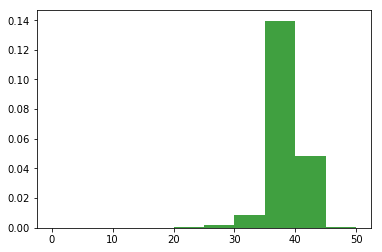

0        39
1        39
2        39
3        39
4        39
5        38
6        40
7        42
8        39
9        35
10       39
11       39
12       37
15       33
16       33
17       39
19       41
20       39
21       39
23       39
24       39
25       39
26       39
27       42
28       37
29       40
31       41
32       38
33       39
34       39
         ..
13548    39
13551    38
13552    38
13553    39
13554    39
13555    39
13556    39
13557    39
13559    39
13560    40
13561    44
13562    38
13563    40
13564    39
13565    41
13566    40
13569    38
13570    39
13571    39
13572    39
13573    39
13574    39
13576    39
13578    39
13579    39
13581    39
13584    34
13588    39
13591    39
13592    39
Name: prglngth, Length: 9148, dtype: int64


In [17]:
# Solution goes here
import pandas as pd
import matplotlib.pyplot as plt

plt.figure()
length = live['prglngth']
n, bins, patches = plt.hist(length, 10, normed=1, facecolor='green', alpha=0.75)
"""
# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
"""
plt.show()
print(length)

`Hist` provides smallest, which select the lowest values and their frequencies.

In [18]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

10.0 2
11.0 1
12.0 1
13.0 14
14.0 43
15.0 128
16.0 242
17.0 398
18.0 546
19.0 559


Use `Largest` to display the longest pregnancy lengths.

In [19]:
[str(w) + " " + str(f) for w,f in hist.Largest(10)]

['44.0 1',
 '43.0 1',
 '42.0 2',
 '41.0 14',
 '40.0 21',
 '39.0 34',
 '38.0 55',
 '37.0 83',
 '36.0 99',
 '35.0 138']

From live births, we can selection first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

In [20]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

We can use `width` and `align` to plot two histograms side-by-side.

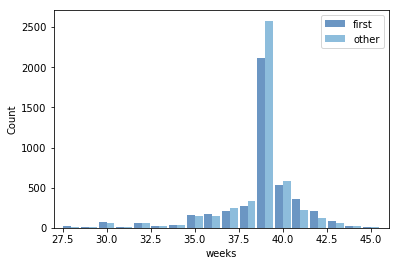

In [21]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

`Series` provides methods to compute summary statistics:

In [22]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

Here are the mean and standard deviation:

In [23]:
mean, std

(38.56055968517709, 2.702343810070593)

As an exercise, confirm that `std` is the square root of `var`:

In [24]:
print(var**(1/2) == std)
print(var == std * std) 

True
True


Here's are the mean pregnancy lengths for first babies and others:

In [25]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

And here's the difference (in weeks):

In [26]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [27]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [28]:
print("Cohen's d = {}".format(CohenEffectSize(firsts.prglngth, others.prglngth)))

Cohen's d = 0.028879044654449883


## Exercises

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [29]:
# Solution goes here
firsts.totalwgt_lb.mean() - others.totalwgt_lb.mean()

-0.12476118453549034

In [30]:
# Solution goes here
print("Cohen's d = {}".format(CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)))

Cohen's d = -0.088672927072602


For the next few exercises, we'll load the respondent file:

In [31]:
resp = nsfg.ReadFemResp()
resp.describe()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,totincr_i,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,intvlngth
count,7643.000000,7643.000000,7643.000000,7643.000000,7643.000000,7636.000000,7643.000000,7643.000000,7643.000000,7643.000000,...,7643.000000,7643.000000,7643.000000,7643.000000,7643.000000,7643.00000,7643.000000,7643.000000,7643.000000,7643.000000
mean,6272.107811,2.589952,4.901086,3.210258,4.207641,4.543740,29.501374,29.503729,872.764098,29.503729,...,0.082428,0.020411,4165.454807,5285.022176,8054.522410,1.48986,44.574905,1232.783200,1220.783200,82.755558
std,3638.824134,1.957642,0.621227,1.453237,1.594345,0.915728,8.431868,8.433187,101.161818,8.433187,...,0.275034,0.141410,3210.203026,4506.081386,7342.734883,0.49993,24.239897,2.978545,2.978545,32.618328
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,15.000000,688.000000,15.000000,...,0.000000,0.000000,64.577101,71.201194,118.656790,1.00000,1.000000,1225.000000,1213.000000,13.512667
25%,3105.500000,1.000000,5.000000,2.000000,5.000000,4.000000,22.000000,22.000000,787.000000,22.000000,...,0.000000,0.000000,2418.149898,2900.050198,4175.880599,1.00000,25.000000,1231.000000,1219.000000,60.527833
50%,6275.000000,1.000000,5.000000,3.000000,5.000000,5.000000,30.000000,30.000000,873.000000,30.000000,...,0.000000,0.000000,3410.500996,4212.069520,6553.169964,1.00000,45.000000,1233.000000,1221.000000,78.180833
75%,9442.000000,5.000000,5.000000,4.000000,5.000000,5.000000,37.000000,37.000000,959.500000,37.000000,...,0.000000,0.000000,4870.774756,6033.357685,9590.027246,2.00000,65.000000,1235.000000,1223.000000,99.281000
max,12571.000000,5.000000,5.000000,8.000000,5.000000,5.000000,44.000000,44.000000,1058.000000,44.000000,...,1.000000,1.000000,99707.832014,157143.686687,261879.953864,2.00000,84.000000,1239.000000,1227.000000,306.238000


Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7876&srtLabel=607543).

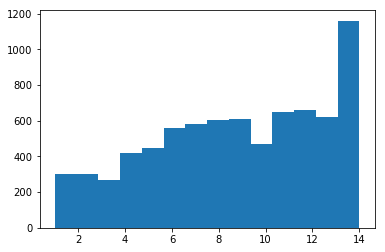

0        9
1       10
2        5
3       13
4        6
5        7
6        6
7       12
8        6
9       12
10       9
11      13
12       7
13       8
14       6
15       9
16       5
17       2
18       9
19       4
20      12
21      12
22       8
23      13
24      10
25       6
26      11
27       2
28      11
29       9
        ..
7613    13
7614     7
7615    14
7616     4
7617    12
7618     8
7619    14
7620     8
7621    11
7622    14
7623    14
7624    12
7625    14
7626     2
7627     3
7628    14
7629     4
7630     5
7631     1
7632     6
7633     9
7634     5
7635     8
7636     3
7637     8
7638    14
7639    14
7640    10
7641    13
7642    11
Name: totincr, Length: 7643, dtype: int64


In [38]:
# Solution goes here
import matplotlib.pyplot as plt
import numpy as np

plt.hist(resp['totincr'], bins=14)
plt.show() i

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

In [33]:
# Solution goes here

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

In [34]:
# Solution goes here

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

In [35]:
# Solution goes here

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [36]:
# Solution goes here

Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

In [37]:
# Solution goes here

Find the largest parities for high income respondents.

In [38]:
# Solution goes here

Compare the mean <tt>parity</tt> for high income respondents and others.

In [39]:
# Solution goes here

Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [40]:
# Solution goes here